In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score


***

### Reading data

In [3]:
df = pd.read_csv('processedData.csv', index_col=[0])
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,marital_divorced,marital_married,marital_single
0,5,261,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,5,149,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,3,226,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,3,151,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,5,307,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,334,1,3,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,0,1,0
41184,4,383,1,3,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,0,1,0
41185,5,189,2,3,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,0,1,0
41186,4,442,1,3,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,0,1,0


In [4]:
def converty(x):
    if x=='yes':
        return 1
    return 0

y = df['y']
y = y.apply(converty)
X = df.drop(columns=['y'])

***

### Splitting data into test and train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)


### SMOTE oversampled Data

In [8]:
# Create an oversampled training data
smote = SMOTE(random_state = 17)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)

### Standardized data

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_SMOTE_std = scaler.transform(X_SMOTE)

***

### Classification Report Plot function

In [11]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.summer):
    title = title or 'Classification report'
    lines = cr.split('\n')
    classes = []
    matrix = []

    for line in lines[2:(len(lines)-4)]:
        s = line.split()
        classes.append(s[0])
        value = [float(x) for x in s[1: len(s) - 1]]
        matrix.append(value)

    fig, ax = plt.subplots(1)

    for column in range(len(matrix)+1):
        for row in range(len(classes)):
            txt = matrix[row][column]
            ax.text(column,row,matrix[row][column],va='center',ha='center')

    fig = plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(len(classes)+1)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()

***

## SVM

* ### SVM Linear on imbalanced data

In [43]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = svm_model.predict(X_test)

In [45]:
svm_acc = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
svm_bacc = round(metrics.balanced_accuracy_score(y_test, y_pred)*100, 2)

print(f"Accuracy: {svm_acc}%")
print(f"Balanced Accuracy: {svm_bacc}%")

Accuracy: 87.57%
Balanced Accuracy: 67.53%


In [46]:
svm_cm = confusion_matrix(y_test, y_pred)
print(svm_cm)

[[6823  480]
 [ 544  388]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

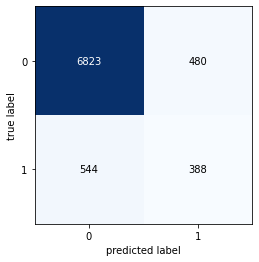

In [47]:
plot_confusion_matrix(svm_cm)

In [48]:
svm_classification_report = classification_report(y_test, y_pred)
print(svm_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.42      0.43       932

    accuracy                           0.88      8235
   macro avg       0.69      0.68      0.68      8235
weighted avg       0.87      0.88      0.87      8235



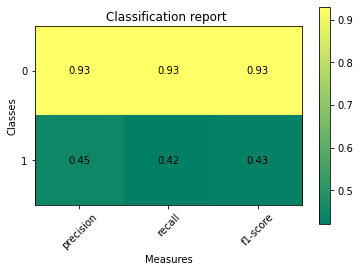

In [14]:
svm_cr = """            precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.42      0.43       932

    accuracy                           0.88      8235
   macro avg       0.69      0.68      0.68      8235
weighted avg       0.87      0.88      0.87      8235"""

plot_classification_report(svm_cr)

In [49]:
svm_f1 = f1_score(y_test, y_pred, average=None)
svm_f1

array([0.93019768, 0.43111111])

* ### SVM Linear on standard scaled imbalanced data

In [51]:
svm_std_model = svm.SVC(kernel='linear')
svm_std_model.fit(X_train_std, y_train)

SVC(kernel='linear')

In [52]:
y_pred_std = svm_std_model.predict(X_test)

In [53]:
svm_std_acc = round(metrics.accuracy_score(y_test, y_pred_std)*100, 2)
svm_std_bacc = round(metrics.balanced_accuracy_score(y_test, y_pred_std)*100, 2)

print(f"Accuracy: {svm_std_acc}%")
print(f"Balanced Accuracy: {svm_std_bacc}%")

Accuracy: 11.32%
Balanced Accuracy: 50.0%


In [54]:
svm_std_cm = confusion_matrix(y_test, y_pred_std)
print(svm_std_cm)

[[   0 7303]
 [   0  932]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

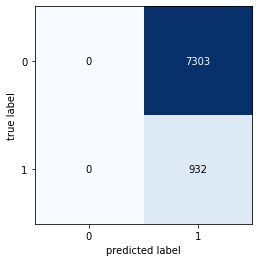

In [55]:
plot_confusion_matrix(svm_std_cm)

In [56]:
svm_std_classification_report = classification_report(y_test, y_pred_std)
print(svm_std_classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7303
           1       0.11      1.00      0.20       932

    accuracy                           0.11      8235
   macro avg       0.06      0.50      0.10      8235
weighted avg       0.01      0.11      0.02      8235



/home/prastogi/anaconda3/envs/my_env_py/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


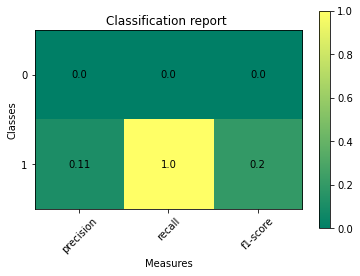

In [43]:
svm_std_cr = """           precision    recall  f1-score   support

           0       0.00      0.00      0.00      7303
           1       0.11      1.00      0.20       932

    accuracy                           0.11      8235
   macro avg       0.06      0.50      0.10      8235
weighted avg       0.01      0.11      0.02      8235"""

plot_classification_report(svm_std_cr)

In [57]:
svm_std_f1 = f1_score(y_test, y_pred_std, average=None)
svm_std_f1

array([0.        , 0.20333806])

* ### SVM RBF (Radial Basis Function) on standard scaled imbalanced data

In [63]:
param_grid1 = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid1,refit=True,verbose=2, n_jobs = -1)
grid.fit(X_train_std,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed: 47.4min remaining: 10.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 50.8min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [64]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.01)


In [65]:
grid_predictions = grid.predict(X_test_std)

In [66]:
svm_rbf_ss_acc = round(metrics.accuracy_score(y_test, grid_predictions)*100, 2)
svm_rbf_ss_bacc = round(metrics.balanced_accuracy_score(y_test, grid_predictions)*100, 2)

print(f"Accuracy: {svm_rbf_ss_acc}%")
print(f"Balanced Accuracy: {svm_rbf_ss_bacc}%")

Accuracy: 91.04%
Balanced Accuracy: 68.83%


In [67]:
svm_rbf_ss_cm = confusion_matrix(y_test, grid_predictions)
print(svm_rbf_ss_cm)

[[7123  180]
 [ 558  374]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

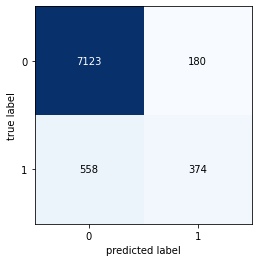

In [68]:
plot_confusion_matrix(svm_rbf_ss_cm)

In [69]:
svm_rbf_ss_classification_report = classification_report(y_test, grid_predictions)
print(svm_rbf_ss_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.68      0.40      0.50       932

    accuracy                           0.91      8235
   macro avg       0.80      0.69      0.73      8235
weighted avg       0.90      0.91      0.90      8235



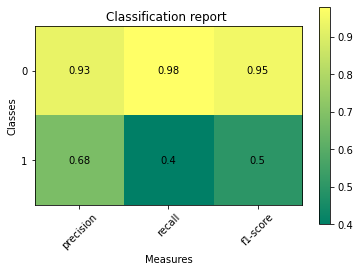

In [12]:
svm_rbf_ss_cr = """            precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.68      0.40      0.50       932

    accuracy                           0.91      8235
   macro avg       0.80      0.69      0.73      8235
weighted avg       0.90      0.91      0.90      8235"""

plot_classification_report(svm_rbf_ss_cr)

In [70]:
svm_rbf_ss_f1 = f1_score(y_test, grid_predictions, average=None)
svm_rbf_ss_f1

array([0.95074746, 0.50336474])

* ### SVM Linear on SMOTE data

In [71]:
param_gridS = {'C': [0.1, 1, 10], 'gamma': [1,0.1,0.01],'kernel': ['linear']}
svm_smote = GridSearchCV(SVC(), param_gridS, refit=True, verbose=1, n_jobs = -1)
svm_smote.fit(X_SMOTE, y_SMOTE) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 33.3min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=1)

In [72]:
print(svm_smote.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [73]:
y_smote_predictions = svm_smote.predict(X_test)

In [74]:
svm_smote_acc = round(metrics.accuracy_score(y_test, y_smote_predictions)*100, 2)
svm_smote_bacc = round(metrics.balanced_accuracy_score(y_test, y_smote_predictions)*100, 2)

print(f"Accuracy: {svm_smote_acc}%")
print(f"Balanced Accuracy: {svm_smote_bacc}%")

Accuracy: 89.36%
Balanced Accuracy: 66.67%


In [75]:
svm_smote_cm = confusion_matrix(y_test, y_smote_predictions)
print(svm_smote_cm)

[[7011  292]
 [ 584  348]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

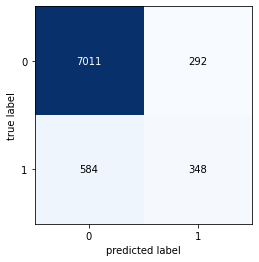

In [76]:
plot_confusion_matrix(svm_smote_cm)

In [77]:
svm_smote_classification_report = classification_report(y_test, y_smote_predictions)
print(svm_smote_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7303
           1       0.54      0.37      0.44       932

    accuracy                           0.89      8235
   macro avg       0.73      0.67      0.69      8235
weighted avg       0.88      0.89      0.88      8235



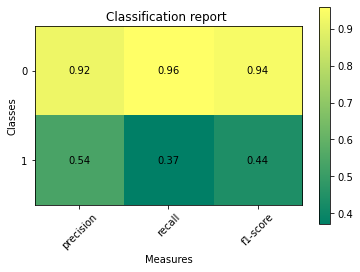

In [24]:
svm_smote_cr = """            precision    recall  f1-score   support

           0       0.92      0.96      0.94      7303
           1       0.54      0.37      0.44       932

    accuracy                           0.89      8235
   macro avg       0.73      0.67      0.69      8235
weighted avg       0.88      0.89      0.88      8235"""

plot_classification_report(svm_smote_cr)

In [78]:
svm_smote_f1 = f1_score(y_test, y_smote_predictions, average=None)
svm_smote_f1

array([0.94120016, 0.44274809])

* ### SVM Linear on Standard Scaled SMOTE Data

In [13]:
bs = ShuffleSplit(n_splits=5,test_size=0.2,random_state=17)
param_grid = {'C':[0.1,1, 10]}

svm_ss_smote = GridSearchCV(SVC(kernel = 'linear'), param_grid, refit=True,verbose=2, cv = bs, n_jobs = -1)
svm_ss_smote.fit(X_SMOTE_std, y_SMOTE)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 15.7min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 48.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=17, test_size=0.2, train_size=None),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, verbose=2)

In [14]:
print(svm_ss_smote.best_estimator_)

SVC(C=0.1, kernel='linear')


In [15]:
grid_predictions_ss_SMOTE = svm_ss_smote.predict(X_test_std)

In [16]:
svm_ss_smote_acc = round(metrics.accuracy_score(y_test, grid_predictions_ss_SMOTE)*100, 2)
svm_ss_smote_bacc = round(metrics.balanced_accuracy_score(y_test, grid_predictions_ss_SMOTE)*100, 2)

print(f"Accuracy: {svm_ss_smote_acc}%")
print(f"Balanced Accuracy: {svm_ss_smote_bacc}%")

Accuracy: 90.53%
Balanced Accuracy: 65.55%


In [17]:
svm_ss_smote_cm = confusion_matrix(y_test, grid_predictions_ss_SMOTE)
print(svm_ss_smote_cm)

[[7145  158]
 [ 622  310]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

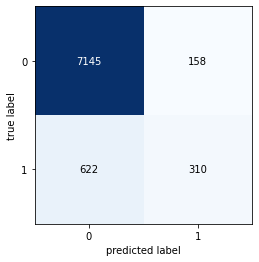

In [18]:
plot_confusion_matrix(svm_ss_smote_cm)

In [19]:
svm_ss_smote_classification_report = classification_report(y_test, grid_predictions_ss_SMOTE)
print(svm_ss_smote_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.66      0.33      0.44       932

    accuracy                           0.91      8235
   macro avg       0.79      0.66      0.70      8235
weighted avg       0.89      0.91      0.89      8235



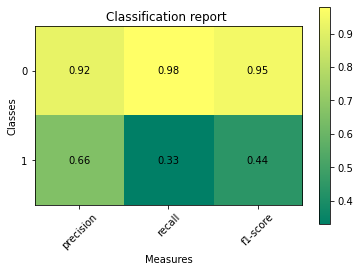

In [20]:
svm_ss_smote_cr = """            precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.66      0.33      0.44       932

    accuracy                           0.91      8235
   macro avg       0.79      0.66      0.70      8235
weighted avg       0.89      0.91      0.89      8235"""

plot_classification_report(svm_ss_smote_cr)

In [61]:
svm_ss_smote_f1 = f1_score(y_test, grid_predictions_ss_SMOTE, average=None)
svm_ss_smote_f1

array([0.94824154, 0.44285714])

* ### SVM RBF on Standard Scaled SMOTE data


In [34]:
svm_rbf_ss_smote = make_pipeline(StandardScaler(), SVC(C=10, cache_size = 200, kernel = 'rbf', gamma = 0.01))
svm_rbf_ss_smote.fit(X_SMOTE, y_SMOTE)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.01))])

In [37]:
y_pred_rbf_ss_SMOTE = svm_rbf_ss_smote.predict(X_test_std)

In [36]:
svm_rbf_ss_smote_acc = round(metrics.accuracy_score(y_test, y_pred_rbf_ss_SMOTE)*100, 2)
svm_rbf_ss_smote_bacc = round(metrics.balanced_accuracy_score(y_test, y_pred_rbf_ss_SMOTE)*100, 2)

print(f"Accuracy: {svm_rbf_ss_smote_acc}%")
print(f"Balanced Accuracy: {svm_rbf_ss_smote_bacc}%")

Accuracy: 90.53%
Balanced Accuracy: 65.55%


In [38]:
svm_rbf_ss_smote_cm = confusion_matrix(y_test, y_pred_rbf_ss_SMOTE)
print(svm_rbf_ss_smote_cm)

[[7303    0]
 [ 932    0]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

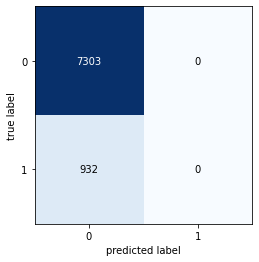

In [39]:
plot_confusion_matrix(svm_rbf_ss_smote_cm)

In [40]:
svm_rbf_ss_smote_classification_report = classification_report(y_test, y_pred_rbf_ss_SMOTE)
print(svm_rbf_ss_smote_classification_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       932

    accuracy                           0.89      8235
   macro avg       0.44      0.50      0.47      8235
weighted avg       0.79      0.89      0.83      8235



/home/prastogi/anaconda3/envs/my_env_py/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


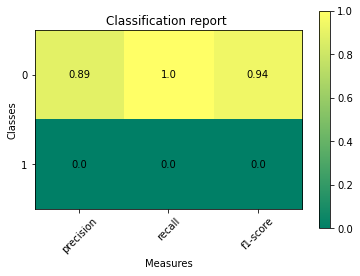

In [41]:
svm_rbf_ss_smote_cr = """             precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       932

    accuracy                           0.89      8235
   macro avg       0.44      0.50      0.47      8235
weighted avg       0.79      0.89      0.83      8235"""

plot_classification_report(svm_rbf_ss_smote_cr)

In [59]:
svm_rbf_ss_smote_f1 = f1_score(y_test, y_pred_rbf_ss_SMOTE, average=None)
svm_rbf_ss_smote_f1

array([0.94001802, 0.        ])

***

## Final Results:

In [82]:
models = ['SVM Linear: Imbalanced Data', 'SVM Linear: Imbalanced Scaled Data', 'SVM RBF: Imbalanced Scaled Data', 'SVM Linear: SMOTE Data', 'SVM Linear: SMOTE Scaled Data', 'SVM RBF: SMOTE Scaled Data']
accs = [svm_acc, svm_std_acc, svm_rbf_ss_acc, svm_smote_acc, svm_ss_smote_acc, svm_rbf_ss_smote_acc]
balanced_accs = [svm_bacc, svm_std_bacc, svm_rbf_ss_bacc, svm_smote_bacc, svm_ss_smote_bacc, svm_rbf_ss_smote_bacc]
f1_scores = [svm_f1[1], svm_std_f1[1], svm_rbf_ss_f1[1], svm_smote_f1[1], svm_ss_smote_f1[1], svm_rbf_ss_smote_f1[1]]

modelsResult = {'Models': models, 'Accuracies': accs, 'Balanced Accuracies': balanced_accs, 'f1-Scores': f1_scores}

modelsDf = pd.DataFrame(modelsResult)
modelsDf

,Models,Accuracies,Balanced Accuracies,f1-Scores
0,SVM Linear: Imbalanced Data,87.57,67.53,0.431111
1,SVM Linear: Imbalanced Scaled Data,11.32,50.00,0.203338
2,SVM RBF: Imbalanced Scaled Data,91.04,68.83,0.503365
3,SVM Linear: SMOTE Data,89.36,66.67,0.442748
4,SVM Linear: SMOTE Scaled Data,90.53,65.55,0.442857
5,SVM RBF: SMOTE Scaled Data,90.53,65.55,0.000000


### Models Performance Comparison

Text(0.5, 1.0, 'Accuracies vs Balanced Accuracies')

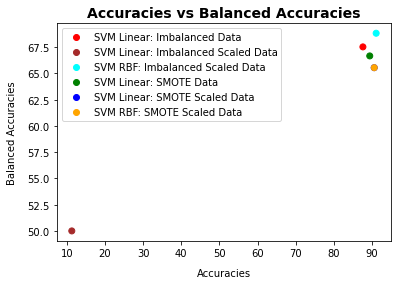

In [80]:
x = modelsDf['Accuracies']
y = modelsDf['Balanced Accuracies']
classes = list(modelsDf['Models'])
values = [0, 1, 2, 3, 4, 5]
colours = ListedColormap(['red','brown','cyan', 'green', 'blue', 'orange'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.xlabel('Accuracies', labelpad=10)
plt.ylabel('Balanced Accuracies', labelpad=10)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Accuracies vs Balanced Accuracies', fontweight='bold', size=14)

Text(0.5, 1.0, 'f1-Scores vs Balanced Accuracies')

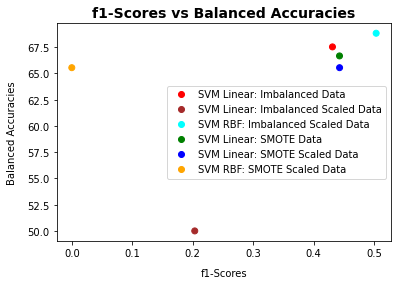

In [83]:
x = modelsDf['f1-Scores']
y = modelsDf['Balanced Accuracies']
classes = list(modelsDf['Models'])
values = [0, 1, 2, 3, 4, 5]
colours = ListedColormap(['red','brown','cyan', 'green', 'blue', 'orange'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.xlabel('f1-Scores', labelpad=10)
plt.ylabel('Balanced Accuracies', labelpad=10)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('f1-Scores vs Balanced Accuracies', fontweight='bold', size=14)

***

## References

* https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
* https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c
* https://stats.stackexchange.com/questions/65094/why-scaling-is-important-for-the-linear-svm-classification
* https://towardsdatascience.com/effect-of-feature-standardization-on-linear-support-vector-machines-13213765b812